In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"]=10,8

In [2]:
df = pd.read_csv('../symptoms-weight.csv', index_col="Unnamed: 0")
symp_weight_df = pd.read_csv('../Symptom-severity.csv')
disease_col = df.pop('Disease')
df.insert(0, 'Disease',disease_col)

In [3]:
symp_weight_df["Symptom"].drop_duplicates(inplace=True)


In [4]:
symp_weight_df.set_index("Symptom",inplace=True)

<AxesSubplot:>

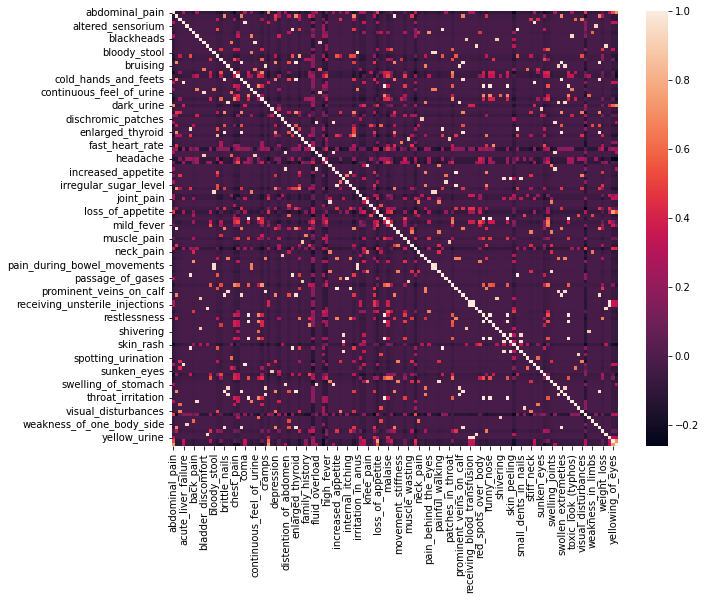

In [5]:
data = df.iloc[:,1:].corr()
sns.heatmap(data=data)

<AxesSubplot:>

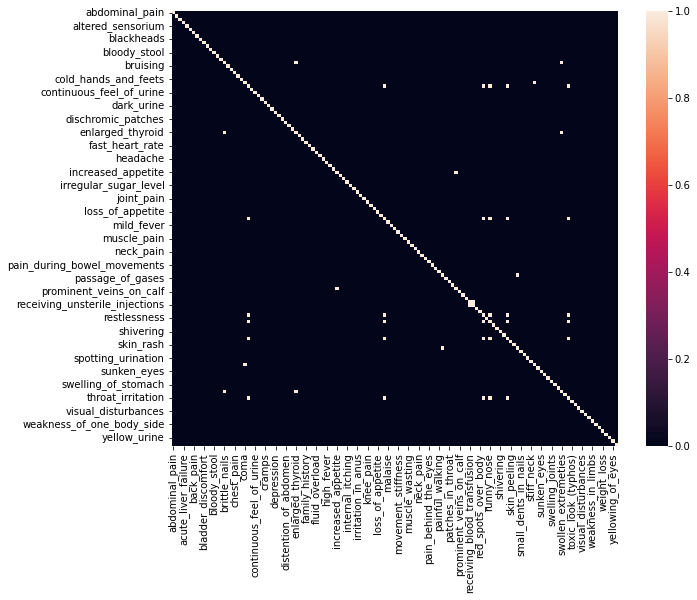

In [6]:
related_data = data.applymap(lambda x: x > 0.99)
sns.heatmap(related_data)

In [7]:
un_filt_related_sympts = related_data.unstack()

filt = (un_filt_related_sympts == True)
un_filt_related_sympts = un_filt_related_sympts.loc[filt]

In [8]:
related_sympts=[]

for pair in un_filt_related_sympts.index:
	if pair[0]!=pair[1]:
		related_sympts.append(list(pair))

related_sympts = np.array(related_sympts)

In [9]:
related_sympts=pd.DataFrame(related_sympts,columns=['symptom1','symptom2'])
related_sympts.to_csv("../related_symptoms.csv")
print(f"related pairs : {related_sympts.shape[0]}")
related_sympts.head()

related pairs : 44


,symptom1,symptom2
0,brittle_nails,enlarged_thyroid
1,brittle_nails,swollen_extremeties
2,coma,stomach_bleeding
3,congestion,loss_of_smell
4,congestion,redness_of_eyes


<AxesSubplot:>

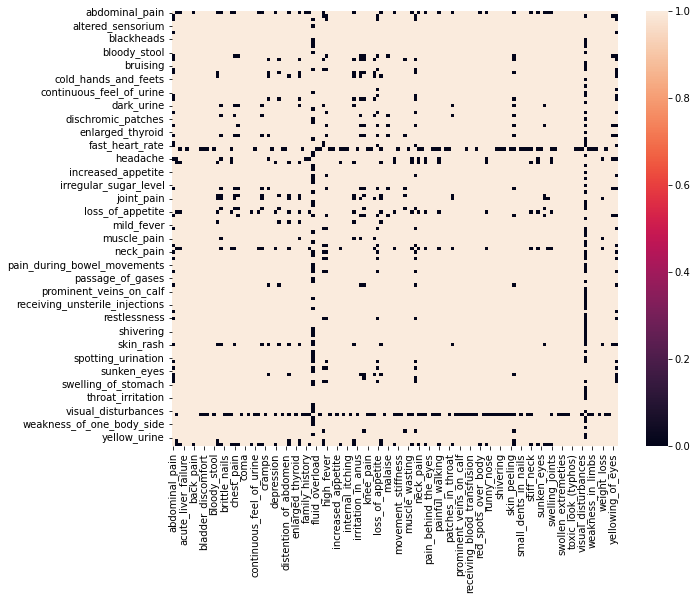

In [10]:
unrelated_data = data.applymap(lambda x: x > -0.1)
sns.heatmap(unrelated_data)

In [11]:
un_filt_unrelated_sympts = unrelated_data.unstack()

filt = (un_filt_unrelated_sympts == True)
un_filt_unrelated_sympts = un_filt_unrelated_sympts.loc[filt]

In [12]:
unrelated_sympts=[]

for pair in un_filt_unrelated_sympts.index:
	if pair[0]!=pair[1]:
		unrelated_sympts.append(list(pair))

unrelated_sympts = np.array(unrelated_sympts)

In [13]:
unrelated_sympts=pd.DataFrame(unrelated_sympts,columns=['symptom1','symptom2'])
# unrelated_sympts.to_csv("../related_symptoms.csv")
print(f"Unrelated pairs : {unrelated_sympts.shape[0]}")
unrelated_sympts.head()

Unrelated pairs : 16308


,symptom1,symptom2
0,abdominal_pain,acute_liver_failure
1,abdominal_pain,altered_sensorium
2,abdominal_pain,anxiety
3,abdominal_pain,belly_pain
4,abdominal_pain,blackheads
